## DSCI - 552 HOMEWORK 5

Name: Varsha Kini$\quad$Github Username: Varsha-Kini$\quad$USC ID: 4013488464  

1. (a) Download the Accute Inflamations data

In [1]:
# Reference: https://www.askpython.com/python/examples/read-data-files-in-python
# Reference: https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
# Replaced ',' by '.' in "Temperature of patient" column in the dataset
# Replaced 'yes' by '1' or 'no' by '0'

import pandas as pd
column_names = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet', 'Inflammation of urinary bladder', ' Nephritis of renal pelvis origin']
data =  pd.read_csv('../data/diagnosis.data', sep="\t", encoding='utf-16',header= None, names=column_names)
data = data.apply(lambda x: x.str.replace(',','.'))
for i in data.columns:
    data[i].replace(('yes', 'no'), (1, 0), inplace=True)
print(data)

    Temperature of patient  Occurrence of nausea  Lumbar pain  Urine pushing  \
0                     35.5                     0            1              0   
1                     35.9                     0            0              1   
2                     35.9                     0            1              0   
3                     36.0                     0            0              1   
4                     36.0                     0            1              0   
..                     ...                   ...          ...            ...   
115                   41.4                     0            1              1   
116                   41.5                     0            0              0   
117                   41.5                     1            1              0   
118                   41.5                     0            1              1   
119                   41.5                     0            1              1   

     Micturition pains  Burning of uret

1. (b) Build a decision tree on the whole data set and plot it.

[Text(0.4, 0.9, 'Temperature of patient <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'Occurrence of nausea <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

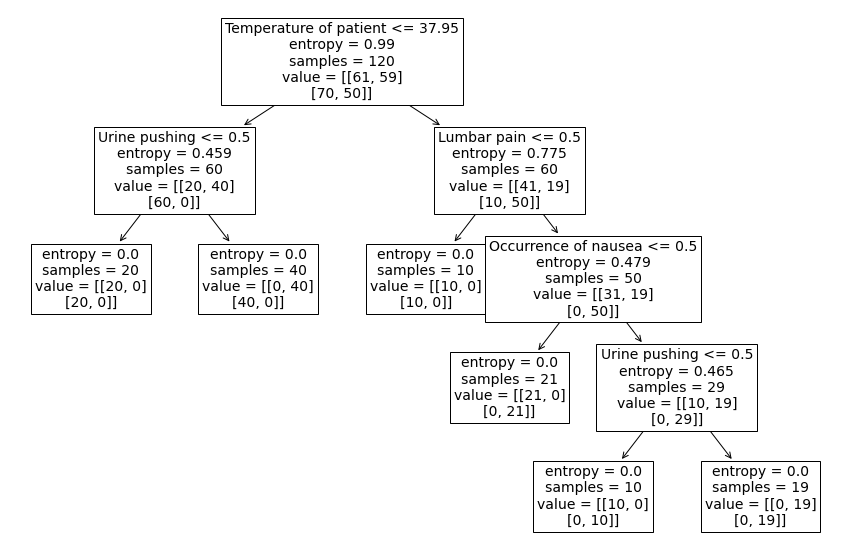

In [2]:
# Reference: https://www.dropbox.com/sh/qyfjqf5svddr7dl/AAADIN1PM8mf8AMRhYG-OtBya/Homework%205%20Data/Simplifying%20Decision%20Tree%20Interpretability%20with%20Python%20%26%20Scikit-learn%20-%20KDnuggets.pdf?dl=0
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X = data.iloc[:,[0,1,2,3,4,5]]
y = data.iloc[:,[6,7]]
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
mod = classifier.fit(X, y)
plt.figure(figsize=(15,10))
tree.plot_tree(mod, feature_names = data.columns, fontsize = 14)

1. (c) Convert the decision rules into a set of IF-THEN rules

In [3]:
# Text representation of the rules
feature_names = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet']
print(tree.export_text(classifier, feature_names = feature_names))

|--- Temperature of patient <= 37.95
|   |--- Urine pushing <= 0.50
|   |   |--- class: 0
|   |--- Urine pushing >  0.50
|   |   |--- class: 1
|--- Temperature of patient >  37.95
|   |--- Lumbar pain <= 0.50
|   |   |--- class: 0
|   |--- Lumbar pain >  0.50
|   |   |--- Occurrence of nausea <= 0.50
|   |   |   |--- class: 0
|   |   |--- Occurrence of nausea >  0.50
|   |   |   |--- Urine pushing <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Urine pushing >  0.50
|   |   |   |   |--- class: 0



In [4]:
# Reference: https://mljar.com/blog/extract-rules-decision-tree/
# Code is taken from the reference given in the Homework5 pdf
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):

    tree_ = tree.tree_
    feature_name = []
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
tree_to_code(mod, data.columns)

  if Temperature of patient <= 37.95000076293945:
    if Urine pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


1. (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability

[0.         0.09332735 0.18435908 0.22748568 0.3672138 ]


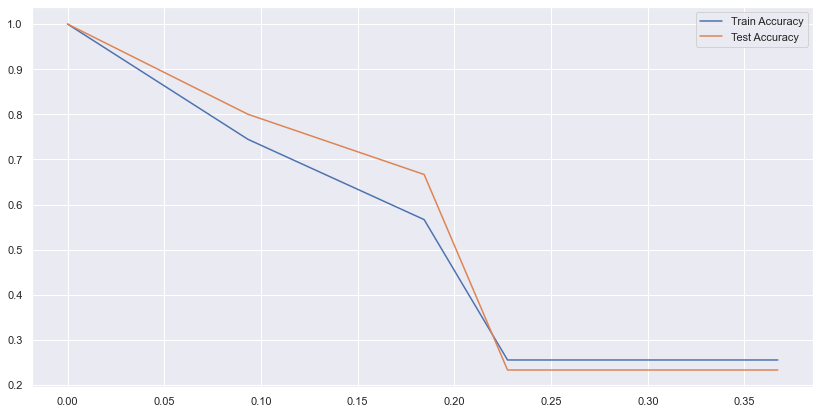

In [5]:
# Reference: https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
mod = classifier.fit(X, y)
path = mod.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
print(alphas)

accuracy_train = [] 
accuracy_test = []
for i in alphas:
    classifier2 = DecisionTreeClassifier(ccp_alpha = i)
    classifier2 = classifier2.fit(X_train, y_train)
    y_pred_train = classifier2.predict(X_train)
    y_pred_test = classifier2.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x=alphas, label="Train Accuracy")
sns.lineplot(y=accuracy_test, x=alphas, label="Test Accuracy")
plt.show()

Test accuracy is maximum at alpha = 0.0

[Text(0.4, 0.9, 'Temperature of patient <= 37.95\ngini = 0.496\nsamples = 90\nvalue = [[47, 43]\n[50, 40]]'),
 Text(0.2, 0.7, 'Lumbar pain <= 0.5\ngini = 0.234\nsamples = 43\nvalue = [[16, 27]\n[43, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [[0, 27]\n[27, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [[16, 0]\n[16, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\ngini = 0.351\nsamples = 47\nvalue = [[31, 16]\n[7, 40]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[7, 0]]'),
 Text(0.7, 0.5, 'Occurrence of nausea <= 0.5\ngini = 0.24\nsamples = 40\nvalue = [[24, 16]\n[0, 40]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [[16, 0]\n[0, 16]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\ngini = 0.222\nsamples = 24\nvalue = [[8, 16]\n[0, 24]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [[8, 0]\n[0, 8]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

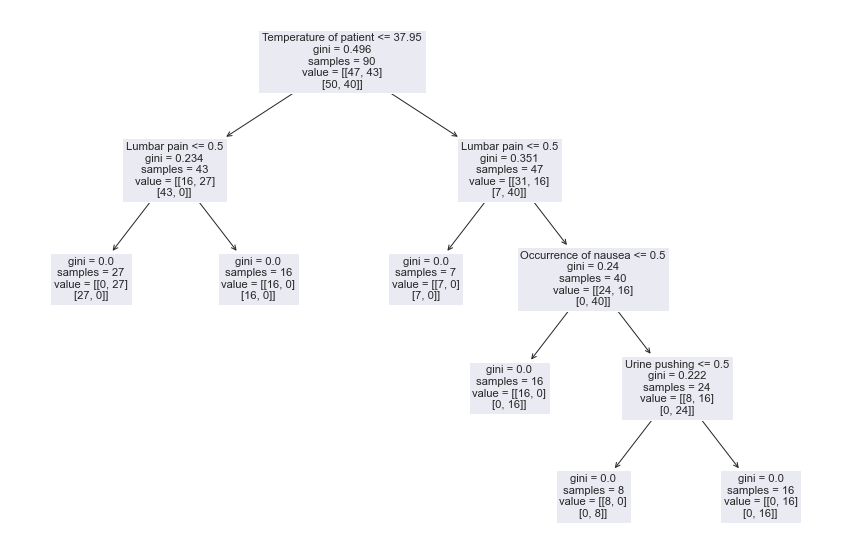

In [6]:
classifier2 = DecisionTreeClassifier(ccp_alpha = 0.0)
classifier2 = classifier2.fit(X_train, y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier2 , feature_names = X_train.columns)

In [7]:
tree_to_code(classifier2, X_train.columns)

  if Temperature of patient <= 37.95000076293945:
    if Lumbar pain <= 0.5:
      return [[ 0. 27.]
 [27.  0.]]
    else:  # if Lumbar pain > 0.5
      return [[16.  0.]
 [16.  0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[7. 0.]
 [7. 0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[16.  0.]
 [ 0. 16.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing <= 0.5:
          return [[8. 0.]
 [0. 8.]]
        else:  # if Urine pushing > 0.5
          return [[ 0. 16.]
 [ 0. 16.]]


2.(a) Download crimes and communities dataset. Use the first 1495 rows of data as the training set and the rest as the test set.

In [8]:
names = pd.read_csv('../data/communities.names', usecols = [0])
names = names.iloc[56:184].reset_index(drop=True)
names = names.iloc[:,0]

data2 = pd.read_csv('../data/communities.data', header=None, names = names)
# Drop features that are non-predictive
data2 = data2.drop(['@attribute state numeric', '@attribute county numeric','@attribute community numeric','@attribute communityname string','@attribute fold numeric'], axis=1)
train = data2.iloc[:1495]
test = data2.iloc[1495:]

In [9]:
train

,@attribute population numeric,@attribute householdsize numeric,@attribute racepctblack numeric,@attribute racePctWhite numeric,@attribute racePctAsian numeric,@attribute racePctHisp numeric,@attribute agePct12t21 numeric,@attribute agePct12t29 numeric,@attribute agePct16t24 numeric,@attribute agePct65up numeric,...,@attribute LandArea numeric,@attribute PopDens numeric,@attribute PctUsePubTrans numeric,@attribute PolicCars numeric,@attribute PolicOperBudg numeric,@attribute LemasPctPolicOnPatr numeric,@attribute LemasGangUnitDeploy numeric,@attribute LemasPctOfficDrugUn numeric,@attribute PolicBudgPerPop numeric,@attribute ViolentCrimesPerPop numeric
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,?,?,?,?,0.00,?,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,?,?,?,?,0.00,?,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,?,?,?,?,0.00,?,0.03


In [10]:
test

,@attribute population numeric,@attribute householdsize numeric,@attribute racepctblack numeric,@attribute racePctWhite numeric,@attribute racePctAsian numeric,@attribute racePctHisp numeric,@attribute agePct12t21 numeric,@attribute agePct12t29 numeric,@attribute agePct16t24 numeric,@attribute agePct65up numeric,...,@attribute LandArea numeric,@attribute PopDens numeric,@attribute PctUsePubTrans numeric,@attribute PolicCars numeric,@attribute PolicOperBudg numeric,@attribute LemasPctPolicOnPatr numeric,@attribute LemasGangUnitDeploy numeric,@attribute LemasPctOfficDrugUn numeric,@attribute PolicBudgPerPop numeric,@attribute ViolentCrimesPerPop numeric
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,?,?,?,?,0.00,?,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,?,?,?,?,0.00,?,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,?,?,?,?,0.00,?,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,?,?,?,?,0.00,?,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,?,?,?,?,0.00,?,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


2. (b) Use a data imputation technique to deal with the missing values in the data set. 

In [11]:
# Reference: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
from sklearn.impute import SimpleImputer

train = train.replace('?', np.NaN)
test = test.replace('?', np.NaN)
# calculating the median of the non-missing values in a column and then replacing the missing values within each column
imp_median = SimpleImputer(strategy='median')
imp_median.fit(train)
updated_train = pd.DataFrame(imp_median.transform(train),columns=train.columns)
updated_test = pd.DataFrame(imp_median.transform(test),columns=test.columns)

In [12]:
updated_train

,@attribute population numeric,@attribute householdsize numeric,@attribute racepctblack numeric,@attribute racePctWhite numeric,@attribute racePctAsian numeric,@attribute racePctHisp numeric,@attribute agePct12t21 numeric,@attribute agePct12t29 numeric,@attribute agePct16t24 numeric,@attribute agePct65up numeric,...,@attribute LandArea numeric,@attribute PopDens numeric,@attribute PctUsePubTrans numeric,@attribute PolicCars numeric,@attribute PolicOperBudg numeric,@attribute LemasPctPolicOnPatr numeric,@attribute LemasGangUnitDeploy numeric,@attribute LemasPctOfficDrugUn numeric,@attribute PolicBudgPerPop numeric,@attribute ViolentCrimesPerPop numeric
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.07,0.03,0.76,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.07,0.03,0.76,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.07,0.03,0.76,0.5,0.00,0.15,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.07,0.03,0.76,0.5,0.00,0.15,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03


In [13]:
updated_test

,@attribute population numeric,@attribute householdsize numeric,@attribute racepctblack numeric,@attribute racePctWhite numeric,@attribute racePctAsian numeric,@attribute racePctHisp numeric,@attribute agePct12t21 numeric,@attribute agePct12t29 numeric,@attribute agePct16t24 numeric,@attribute agePct65up numeric,...,@attribute LandArea numeric,@attribute PopDens numeric,@attribute PctUsePubTrans numeric,@attribute PolicCars numeric,@attribute PolicOperBudg numeric,@attribute LemasPctPolicOnPatr numeric,@attribute LemasGangUnitDeploy numeric,@attribute LemasPctOfficDrugUn numeric,@attribute PolicBudgPerPop numeric,@attribute ViolentCrimesPerPop numeric
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.07,0.03,0.76,0.5,0.00,0.15,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.07,0.03,0.76,0.5,0.00,0.15,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.07,0.03,0.76,0.5,0.00,0.15,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.07,0.03,0.76,0.5,0.00,0.15,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.07,0.03,0.76,0.5,0.00,0.15,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.07,0.03,0.76,0.5,0.00,0.15,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


2. (c) Plot a correlation matrix for the features in the data set

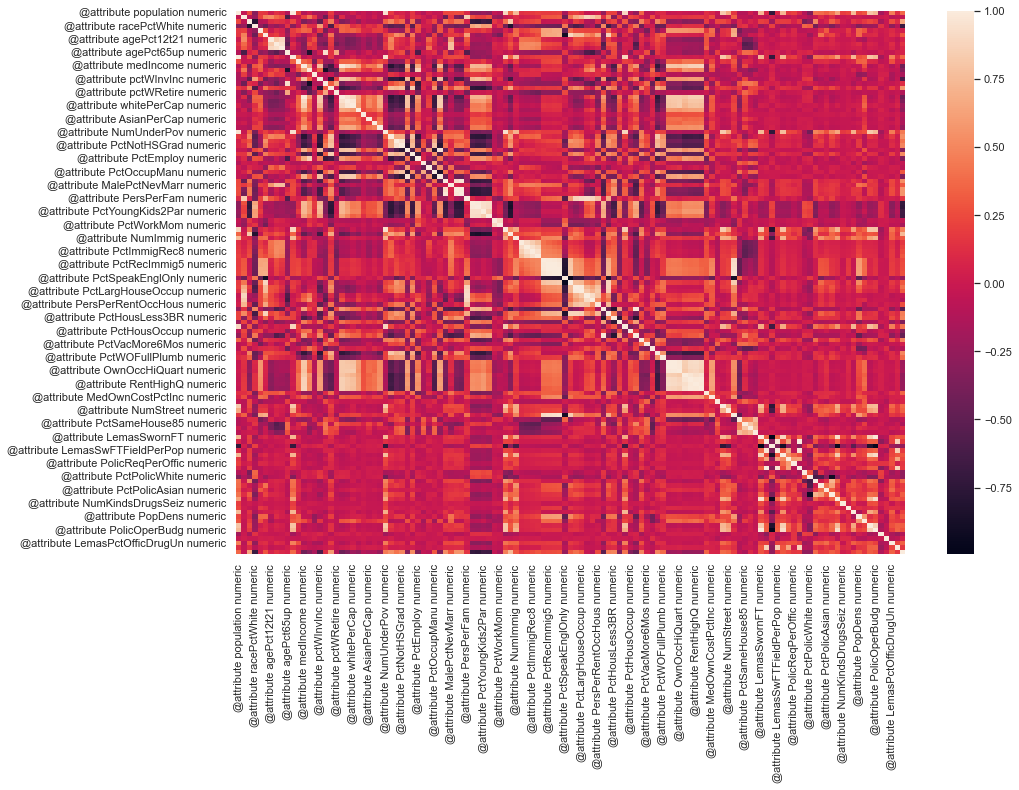

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(updated_train.corr())
plt.show()

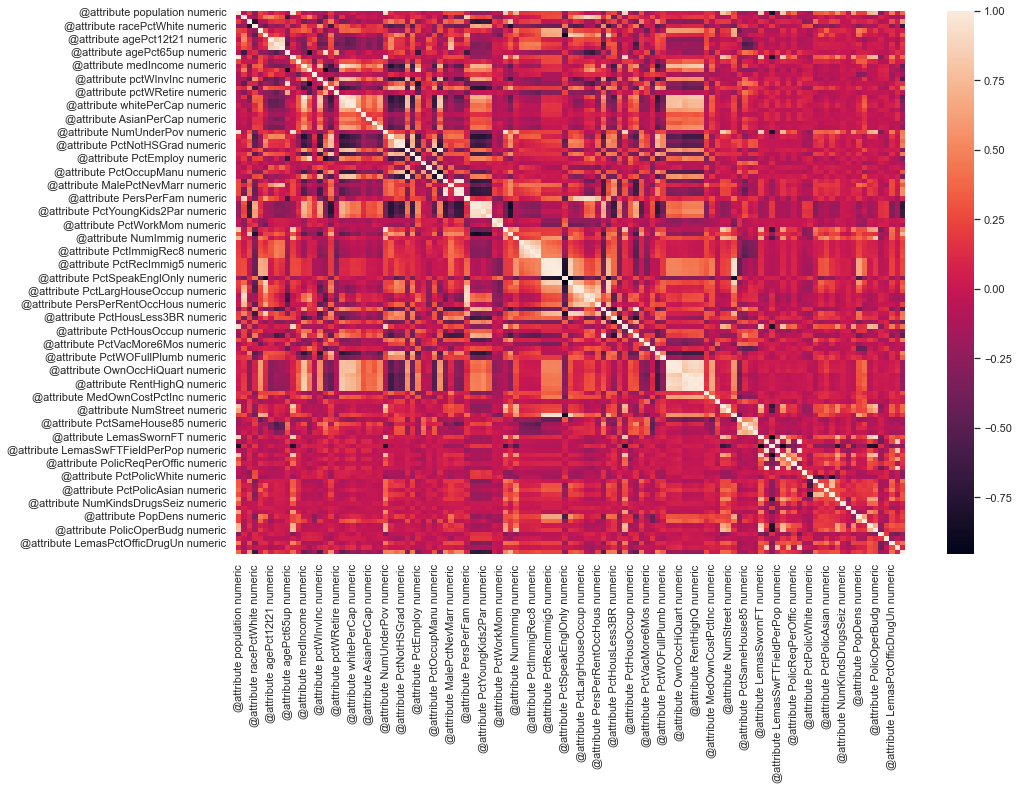

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(updated_test.corr())
plt.show()

2. (d) Calculate the Coefficient of Variation CV for each feature, where CV = ms , in which s is sample standard deviation and m is sample mean

In [16]:
X_train = updated_train.iloc[:, :122]
X_test = updated_test.iloc[:, :122]
y_train = updated_train.iloc[:, -1]
y_test = updated_test.iloc[:, -1]

coeff_CV = pd.DataFrame(X_train.apply(lambda x: np.std(x) / np.mean(x)))
coeff_CV.columns = ["Coefficient of Variation for the Training set"]
coeff_CV

,Coefficient of Variation for the Training set
@attribute population numeric,2.240355
@attribute householdsize numeric,0.355681
@attribute racepctblack numeric,1.428407
@attribute racePctWhite numeric,0.330102
@attribute racePctAsian numeric,1.358645
...,...
@attribute PolicOperBudg numeric,1.644957
@attribute LemasPctPolicOnPatr numeric,0.111995
@attribute LemasGangUnitDeploy numeric,0.334992
@attribute LemasPctOfficDrugUn numeric,2.552092


2. (e) Pick floor of $\sqrt{128}$ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?


In [17]:
import math

coeff_CV = coeff_CV.sort_values("Coefficient of Variation for the Training set", ascending=False)
highest_CV = math.floor(math.sqrt(128))
top = coeff_CV.iloc[:highest_CV,:]
list_col = train[list(top.index.values)]

top

,Coefficient of Variation for the Training set
@attribute PctPolicAsian numeric,5.525210
@attribute NumStreet numeric,4.291487
@attribute NumInShelters numeric,3.469791
@attribute NumIlleg numeric,3.057941
@attribute NumImmig numeric,2.925656
@attribute LemasPctOfficDrugUn numeric,2.552092
@attribute NumUnderPov numeric,2.341660
@attribute LemasSwornFT numeric,2.247290
@attribute population numeric,2.240355
@attribute numbUrban numeric,2.037780


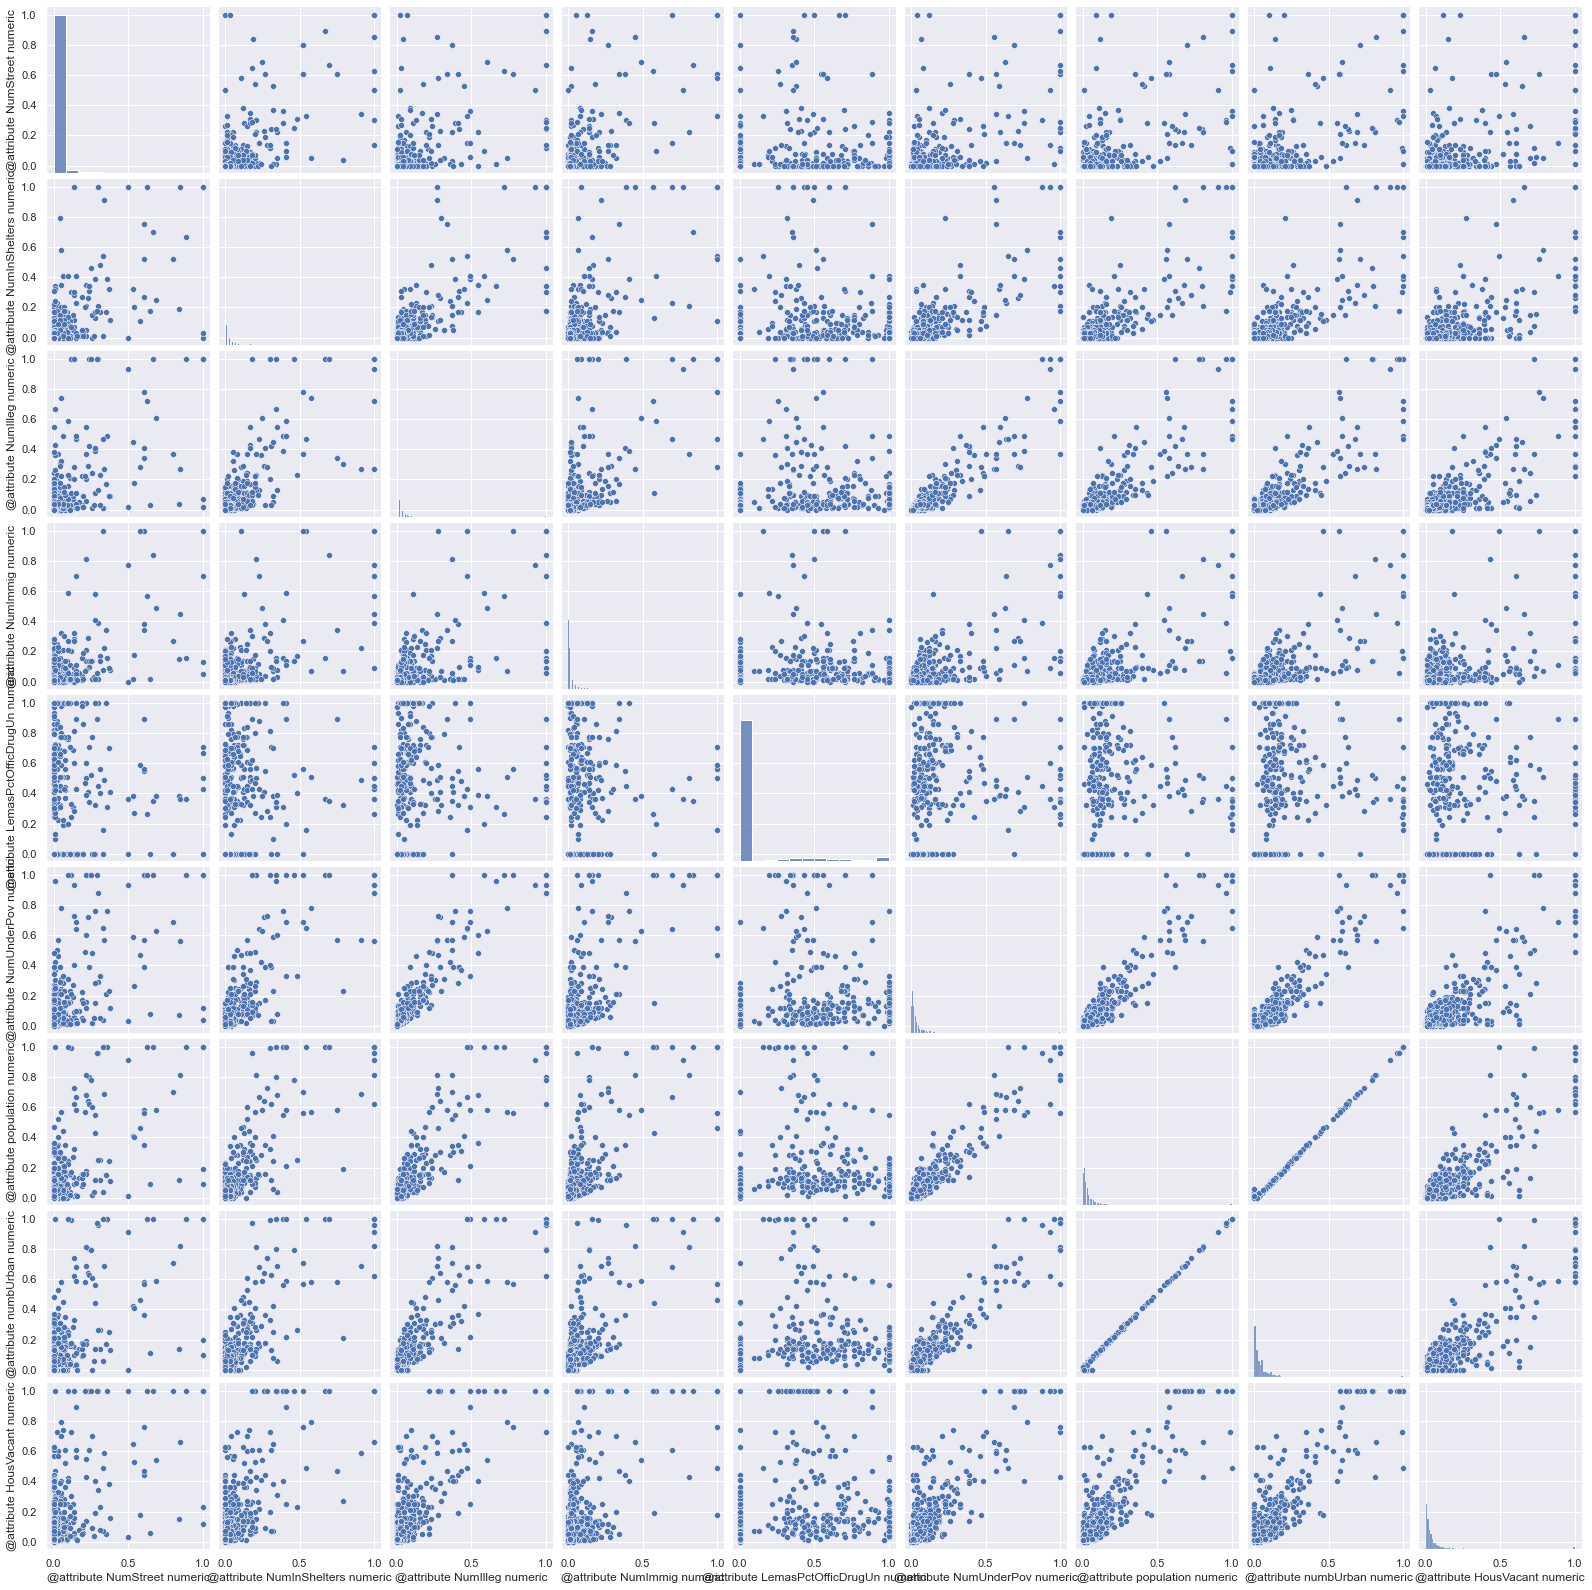

In [18]:
sns.pairplot(list_col)
plt.show()

<AxesSubplot:>

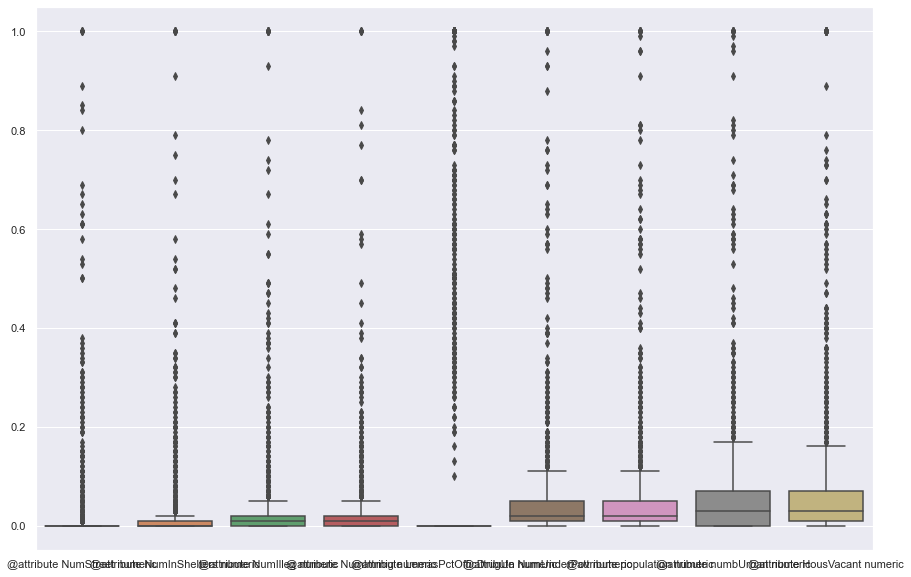

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(data = list_col)

Some features can be seen to be correlated and perfectly linear from the scatterplot, but it is difficlut to decide the significance of the features given the scatterplot and the boxplot alone.

2. (f) Fit a linear model using least squares to the training set and report the test error

In [20]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

model = LinearRegression()
model = model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Test MSE for Linear Regression: ", metrics.mean_squared_error(y_test,prediction))

Test MSE for Linear Regression:  4.293371096614758e+18


2. (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained

In [21]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [22]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
# Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

from sklearn.linear_model import RidgeCV

ridgemodel = RidgeCV(alphas = alphas).fit(X_train, y_train)
prediction =ridgemodel.predict(X_test)
error = metrics.mean_squared_error(y_test,prediction)
print("The lambda chosen by cross validation is: ",ridgemodel.alpha_)
print("Test MSE for Ridge Regression: ", error)

The lambda chosen by cross validation is:  2.320794416806386
Test MSE for Ridge Regression:  0.01751567437630483


In [23]:
import warnings
warnings.filterwarnings('ignore')

2. (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [24]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
var = []
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5, random_state=0,normalize=False).fit(X_train, y_train)
prediction = lasso.predict(X_test)
error = metrics.mean_squared_error(y_test,prediction)
print("Test MSE for LASSO Cross Validation: ", error)

for i, names in enumerate(X_train.columns):
    if (lasso.coef_[i]!=0):
        var.append(X_train.columns[i])
        
print("The lambda chosen by cross validation is: ",lasso.alpha_)
print("Variable selected by the model are: ", var)        

Test MSE for LASSO Cross Validation:  0.017617760569778627
The lambda chosen by cross validation is:  0.00012454087437758504
Variable selected by the model are:  ['@attribute racepctblack numeric', '@attribute racePctAsian numeric', '@attribute agePct12t21 numeric', '@attribute agePct12t29 numeric', '@attribute pctUrban numeric', '@attribute pctWWage numeric', '@attribute pctWFarmSelf numeric', '@attribute pctWInvInc numeric', '@attribute pctWSocSec numeric', '@attribute pctWPubAsst numeric', '@attribute pctWRetire numeric', '@attribute whitePerCap numeric', '@attribute blackPerCap numeric', '@attribute indianPerCap numeric', '@attribute AsianPerCap numeric', '@attribute OtherPerCap numeric', '@attribute HispPerCap numeric', '@attribute PctPopUnderPov numeric', '@attribute PctLess9thGrade numeric', '@attribute PctEmploy numeric', '@attribute PctEmplManu numeric', '@attribute PctOccupManu numeric', '@attribute MalePctDivorce numeric', '@attribute MalePctNevMarr numeric', '@attribute Fem

In [25]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

var = []
stdx_train = StandardScaler().fit_transform(X_train)
stdx_test = StandardScaler().fit_transform(X_test)
stdlasso = LassoCV(cv=5, random_state=0, normalize=False).fit(stdx_train, y_train)
prediction =stdlasso.predict(stdx_test)
error = metrics.mean_squared_error(y_test,prediction)
print("Test MSE for LASSO Cross Validation with Standardised features: ", error)
for i, names in enumerate(X_train.columns):
    if (lasso.coef_[i]!=0):
        var.append(X_train.columns[i])
# print(len(var))
print("The lambda chosen by cross validation is: ",stdlasso.alpha_)
print("Variable selected by the model are: ", var)        

Test MSE for LASSO Cross Validation with Standardised features:  0.017870839701371682
The lambda chosen by cross validation is:  0.0007630833878262516
Variable selected by the model are:  ['@attribute racepctblack numeric', '@attribute racePctAsian numeric', '@attribute agePct12t21 numeric', '@attribute agePct12t29 numeric', '@attribute pctUrban numeric', '@attribute pctWWage numeric', '@attribute pctWFarmSelf numeric', '@attribute pctWInvInc numeric', '@attribute pctWSocSec numeric', '@attribute pctWPubAsst numeric', '@attribute pctWRetire numeric', '@attribute whitePerCap numeric', '@attribute blackPerCap numeric', '@attribute indianPerCap numeric', '@attribute AsianPerCap numeric', '@attribute OtherPerCap numeric', '@attribute HispPerCap numeric', '@attribute PctPopUnderPov numeric', '@attribute PctLess9thGrade numeric', '@attribute PctEmploy numeric', '@attribute PctEmplManu numeric', '@attribute PctOccupManu numeric', '@attribute MalePctDivorce numeric', '@attribute MalePctNevMarr

There is no significant difference between the test error for LASSO Cross Validation and LASSO Cross Validation with Standardised features

2. (i) Fit a PCR model on the training set, with M(the number of principal components) chosen by cross-validation. Report the test error obtained

In [26]:
# Reference: https://www.codegrepper.com/search.php?answer_removed=1&q=name%20%27PCA%27%20is%20not%20defined
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

error = []
m_values = []
for m in range(1, len(train.columns)):
    err = 0
    for i , j in (KFold(n_splits=5).split(train)):
        X_train_new = X_train.iloc[i,:]
        X_test_new = X_train.iloc[j,:]
        y_train_new = y_train.iloc[i]
        y_test_new = y_train.iloc[j]
        pca = PCA(n_components = m) # Choose number of components
        pca.fit(X_train_new)
        X_train_pca = pca.transform(X_train_new)
        X_test_pca = pca.transform(X_test_new)

        model = LinearRegression().fit(X_train_pca, y_train_new)
        prediction = model.predict(X_test_pca)
        err += metrics.mean_squared_error(y_test_new, prediction)
    error.append(err/5)
    m_values.append(m)

In [27]:
print("The value of M chosen by cross-validation is: ", m_values[error.index(min(error))])

The value of M chosen by cross-validation is:  96


In [28]:
pca = PCA(n_components = 96) 
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = LinearRegression().fit(X_train_pca, y_train)
prediction = model.predict(X_test_pca)
error = metrics.mean_squared_error(y_test, prediction)
print("The test error for PCR model is: ", error)

The test error for PCR model is:  0.01833962708377775


2. (j)  In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.


In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Reference: https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

import xgboost as xgb
from sklearn.model_selection import cross_val_score
error = []
alpha = []
for i in alphas:
    model = xgb.XGBRegressor(verbosity=0, alpha = i, objective="reg:squarederror")
    kfold = KFold(n_splits=5, shuffle=True)
    kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
    error.append(abs(kf_cv_scores.mean()))
    alpha.append(i)

print("The value of alpha determined by cross validation: ")
alpha_min = alpha[error.index(min(error))]
print(alpha_min)

The value of alpha determined by cross validation: 
152.69277544167062


In [31]:
model = xgb.XGBRegressor(verbosity=0, alpha = alpha_min , objective="reg:squarederror").fit(X_train, y_train)
prediction = model.predict(X_test)
error = metrics.mean_squared_error(y_test, prediction)
print("Test error for XGBoost Regressor is: ", error)


Test error for XGBoost Regressor is:  0.038290914244965
